In [1]:
import os

base_dir='dataset/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_happy_dir = os.path.join(train_dir, 'Happy')
train_surprised_dir = os.path.join(train_dir, 'Surpirsed')
train_sad_dir = os.path.join(train_dir, 'Sad')
train_angry_dir = os.path.join(train_dir, 'Angry')


# Directory with our validation cat/dog pictures
validation_happy_dir = os.path.join(validation_dir, 'Happy')
validation_surprised_dir = os.path.join(validation_dir, 'Surpirsed')
validation_sad_dir = os.path.join(validation_dir, 'Sad')
validation_angry_dir = os.path.join(validation_dir, 'Angry')


In [14]:
import cv2

#Crop some images
def facechop(image):  
    #print(image)
    facedata = "haarcascade_frontalface_default.xml"
    cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    img = cv2.imread(os.path.join('dataset/train/Happy/',image))


    minisize = (img.shape[1],img.shape[0])
    miniframe = cv2.resize(img, minisize)

    faces = cascade.detectMultiScale(miniframe)

    for f in faces:
        x, y, w, h = [ v for v in f ]
        cv2.rectangle(img, (x,y), (x+w,y+h), (150,150,150))

        sub_face = img[y:y+h, x:x+w]
        face_file_name = "cropped/Happy/face_" + str(y) + ".jpg"
        cv2.imwrite(face_file_name, sub_face)

    #cv2.imshow(image, img)

total=0
surprise=os.listdir( train_happy_dir)
surprise_dir=os.path.join('dataset/train/Happy/')

print(len(surprise))

for i in range(len(os.listdir(train_happy_dir))):
    if(filetype.guess(surprise_dir+surprise[i]) != None):
        facechop(surprise[i])
    


2145


In [2]:
train_happy_fnames = os.listdir( train_happy_dir)
train_surpirsed_fnames = os.listdir( train_surprised_dir)
train_sad_fnames = os.listdir( train_sad_dir)
train_angry_fnames = os.listdir( train_angry_dir)


print(train_happy_fnames[:10])
print(train_surpirsed_fnames[:10])
print(train_sad_fnames[:10])
print(train_angry_fnames[:10])

['happy_train855.jpg', 'happy_train699.jpg', '02_230_2639.jpg', 'happy_train1284.jpg', 'happy_train869.jpg', '09_209_0348.jpg', 'happy_train1290.jpg', '09_228_2440.jpg', 'happy_train128.jpg', 'happy_train114.jpg']
['06_203_9501.jpg', 'Screen Shot 2019-09-14 at 6.38.29 PM.png', 'close-up-shock-surprise-expression-10372967.jpg', '06_302_9828.jpg', 'Screen Shot 2019-09-14 at 10.04.34 PM.png', '06_182_6977.jpg', '06_238_3609.jpg', '06_123_3667.jpg', 'grbh6yqi1ec7lxmoyudhrfaokdrtyt1gi4s1a4eaojl8jraxgen7l1r5brqzn54s-.jpg', 'Screen Shot 2019-09-14 at 6.37.24 PM.png']
['04_223_1850.jpg', '04_124_3751.jpg', 's012-02_img.jpg', 's025-02_img.jpg', '03_264_5815.jpg', 'images (2).jpeg', '03_341_3689.jpg', '04_210_0446.jpg', '04_332_2749.jpg', '03_298_9402.jpg']
['05_282_7689.jpg', '05_293_8888.jpg', '05_148_5568.jpg', '05_232_2911.jpg', '05_124_3756.jpg', 'Prema_18.jpg', '05_311_0834.jpg', 'd231c4b31b162fb745a6364961f329f8.jpg', '6148bd9da79ebf28497898169169ecb6.jpg', 'Irani_59.jpg']


In [9]:
print('total training happy images :', len(os.listdir(train_happy_dir ) ))
print('total training surprised images :', len(os.listdir(train_surprised_dir)))
print('total training sad images :', len(os.listdir(train_sad_dir)))
print('total training angry images :', len(os.listdir(train_angry_dir)))


print('\n')

print('total validation happy images :', len(os.listdir(validation_happy_dir ) ))
print('total validation surprised images :', len(os.listdir(validation_surprised_dir ) ))
print('total validation sad images :', len(os.listdir(validation_sad_dir)))
print('total validation angry images :', len(os.listdir(validation_angry_dir)))




total training happy images : 2145
total training surprised images : 494
total training sad images : 635
total training angry images : 311


total validation happy images : 195
total validation surprised images : 68
total validation sad images : 55
total validation angry images : 26


In [4]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = -1 # Index for iterating over images

dataset/train/Happy/happy_train1284.jpg
dataset/train/Happy/happy_train869.jpg
dataset/train/Happy/09_209_0348.jpg
dataset/train/Happy/happy_train1290.jpg
dataset/train/mixed_surprised/06_302_9828.jpg
dataset/train/mixed_surprised/Screen Shot 2019-09-14 at 10.04.34 PM.png
dataset/train/mixed_surprised/06_182_6977.jpg
dataset/train/mixed_surprised/06_238_3609.jpg
dataset/train/Sad/s025-02_img.jpg
dataset/train/Sad/03_264_5815.jpg
dataset/train/Sad/images (2).jpeg
dataset/train/Sad/03_341_3689.jpg
dataset/train/Angry/05_232_2911.jpg
dataset/train/Angry/05_124_3756.jpg
dataset/train/Angry/Prema_18.jpg
dataset/train/Angry/05_311_0834.jpg


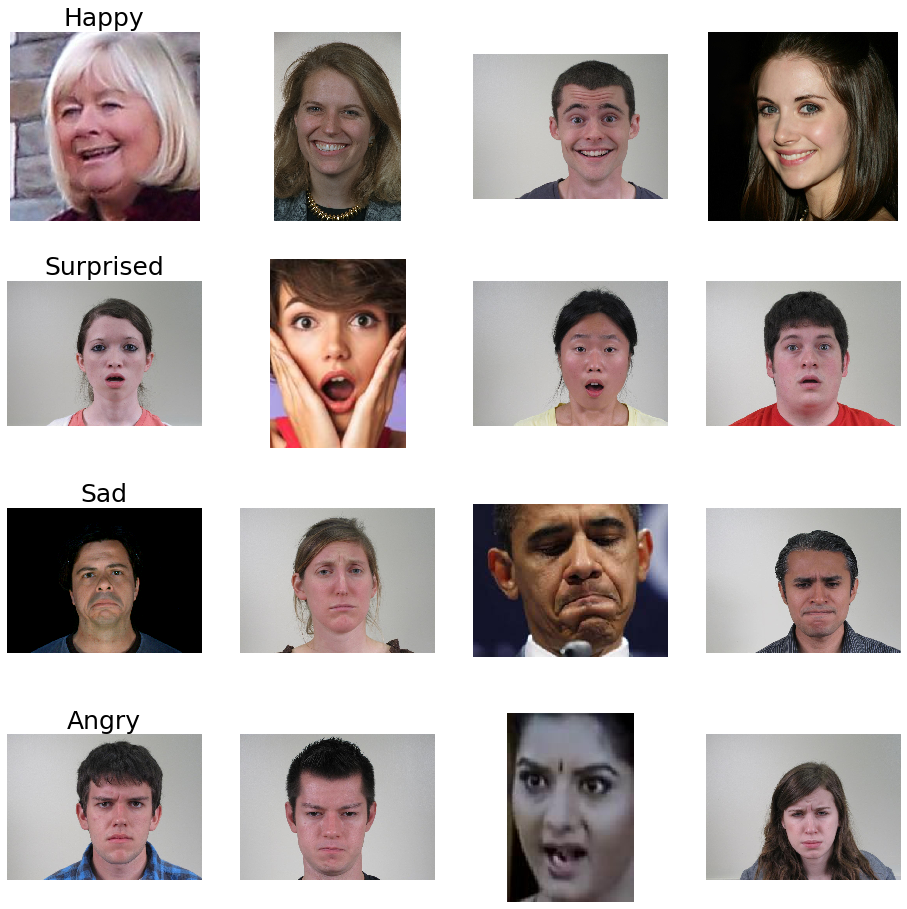

In [6]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=4

next_happy_pix = [os.path.join(train_happy_dir, fname) 
                for fname in train_happy_fnames[ pic_index-4:pic_index] 
               ]

next_surpirsed_pix = [os.path.join(train_surprised_dir, fname) 
                for fname in train_surpirsed_fnames[ pic_index-4:pic_index]
               ]

next_sad_pix = [os.path.join(train_sad_dir, fname) 
                for fname in train_sad_fnames[ pic_index-4:pic_index]
               ]

next_angry_pix = [os.path.join(train_angry_dir, fname) 
                for fname in train_angry_fnames[ pic_index-4:pic_index]
               ]

expressions=['Happy', 'Surprised', 'Sad', 'Angry']
current_expression=0

for i, img_path in enumerate(next_happy_pix+next_surpirsed_pix+next_sad_pix+next_angry_pix):
    # Set up subplot; subplot indices start at 1
    
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('Off') # Don't show axes (or gridlines)
    
    #Print title
    if(i%4==0):
        sp.set_title(expressions[current_expression], fontsize=25)
        current_expression+=1

    print(img_path)
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(data_format=None)
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
])

model.summary()

In [10]:
from tensorflow.keras.optimizers import RMSprop
#l=tf.contrib.losses.metric_learning.triplet_semihard_loss
model.compile(optimizer=RMSprop(lr=0.0001),
              loss='categorical_crossentropy',
              metrics = ['acc'])

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255,
                                    zoom_range=0.2,
                                    shear_range=0.2,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    horizontal_flip=True
                                    )

test_datagen  = ImageDataGenerator( rescale = 1.0/255,
                                    zoom_range=0.2,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    shear_range=0.2,
                                    horizontal_flip=True
                                    )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(64, 64))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (64, 64))

Found 3587 images belonging to 4 classes.
Found 340 images belonging to 4 classes.


In [ ]:
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              pipleine=my_pipelie
                              #validation_steps=50,
                              verbose=2)

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()